In [1467]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.lines import Line2D
import os

# Carpeta en la que se ubican las tablas a integrar

In [1468]:
print(os.getcwd())

C:\Users\alan.islas\ownCloud\Fuentes de tableros


# Carga de tablas 

In [1469]:
# Load the XLSX files into Pandas dataframes
# La primera parte es la subcarpeta, después de la barra, /, el nombre del archivo
Inventario = pd.read_excel('Inventarios/02-05.xlsx', skiprows=2)
Ventas = pd.read_excel('Ventas/Ventas.xlsx', skiprows=2)
Utilidad = pd.read_excel('Ventas/Utilidad.xlsx', skiprows=2)
Cartera = pd.read_excel('Cartera/02-05.xlsx', skiprows=2)
Egresos = pd.read_excel('Egresos/Egresos.xlsx', skiprows=2)
Egresos_ = pd.read_excel('Egresos/Egresos_.xlsx', skiprows=2)
Pendiente = pd.read_excel('Suministro/Pendiente.xlsx', skiprows=2)
IQChemicals = pd.read_excel('IQChemicals/Otros.xlsx', skiprows=2)
IQChemicals_mp = pd.read_excel('IQChemicals/Materia_prima.xlsx', skiprows=2)
CxP = pd.read_excel('CxP/CxP.xlsx', skiprows=2)
Forecast = pd.read_excel('Forecast/Forecast.xlsx')
Utilidad_PDN_23_ = pd.read_excel('Plan/Plan.xlsx', skiprows=2)


# Cobranza por empresa
Cobranza_MX= pd.read_excel('Cobranza/Mx.xlsx', skiprows=1)
Cobranza_MX['Empresa']= "MX"
Cobranza_CAC = pd.read_excel('Cobranza/CAC.xlsx', skiprows=1)
Cobranza_CAC['Empresa']= "CAC"
Cobranza_SUD = pd.read_excel('Cobranza/SUD.xlsx', skiprows=1)
Cobranza_SUD['Empresa']= "SUD"
Cobranza_IQC = pd.read_excel('Cobranza/IQC.xlsx', skiprows=1)
Cobranza_IQC['Empresa']= "IQC"
Cobranza_INT = pd.read_excel('Cobranza/INT.xlsx', skiprows=1)
Cobranza_INT['Empresa']= "INT"
Cobranza = pd.concat([Cobranza_MX, Cobranza_CAC, Cobranza_SUD, Cobranza_IQC, Cobranza_INT])
Cobranza = Cobranza[Cobranza['7 FlujosA'] == '2 Cobranza']
Flujo = pd.concat([Cobranza_MX, Cobranza_CAC, Cobranza_SUD, Cobranza_IQC, Cobranza_INT])
Flujo = Flujo[Flujo['7 FlujosA'] == '1 Flujo Neto Generado']

# Tabla auxiliar para traducir unidades en costo
Pres_a_vol = pd.read_excel('Categorias/Presentacion_a_volumen.xlsx')
Item_a_producto = pd.read_excel('Categorias/Item_a_producto.xlsx')
Costos_unitarios = pd.read_excel('Costo_unitario/Costo.xlsx',skiprows=2)
Producto = pd.read_excel('Categorias/Producto.xlsx')



C:\Users\alan.islas\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\alan.islas\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\alan.islas\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\alan.islas\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\alan.islas\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserW

In [1470]:
Zona = pd.read_excel('Categorias/Zona.xlsx')

# Revisión de Tablas consideradas y columnas disponibles

Campos disponible:
Se muestra nombre de columna y primera fila,

In [1471]:
#Muestra los headers de cada tabla:
print("---------Inventario---------")
print(Inventario.iloc[0,:])
print("---------Ventas---------")
print(Ventas.iloc[0,:])
print("---------Utilidad---------")
print(Utilidad.iloc[0,:])
print("---------Cartera---------")
print(Cartera.iloc[0,:])
print("---------Egresos_---------")
print(Egresos_.iloc[0,:])
print("---------Pendiente---------")
print(Pendiente.iloc[0,:])
print("---------IQChemicals---------")
print(IQChemicals.iloc[0,:])
print("---------IqChemicals_mp---------")
print(IQChemicals_mp.iloc[0,:])
print("---------CxP---------")
print(CxP.iloc[0,:])
print("---------Forecast---------")
print(Forecast.iloc[0,:])
print("---------Cobranza---------")
print(Cobranza_MX.iloc[0,:])
print("---------Utilidad_PDN_23_---------")
print(Utilidad_PDN_23_.iloc[0,:])

---------Inventario---------
CATEGORIA                         StressOff
GPO_INV                 JUNIPERUS STRESSOFF
PRESENTACION                           1X20
EMPRESA                                  MX
Número de artículo            JUNIPERUS1X20
Sum of KL_INVENTARIO                  14520
KL_FORECAST                               0
Sum of VENTAS_INV              1133094.4086
VENTAS_FORECAST                         0.0
VARIACIONF                            14520
VALOR INVENTARIO                497928.7698
Name: 0, dtype: object
---------Ventas---------
RETENUM                                             RETENUM
Empresa                                                 CAC
Empresa Jerarquía - Zona Ranking_                 03 Zona 2
Empresa Jerarquía - RM/ REIQ_Ranking     08 Agrícola Piscis
Empresa Jerarquía - Cultivo_ranking               03 BANANO
ID_PRODUCTO                                AGGB10%4X5-CENCR
'Base'[Mes]                                               1
Ver selección      

# Limpieza y proceso de tablas para integrar la base de componentes financieros

##### La hoja de inventario IqChemicals, tiene dos tablas. Para el análisis, se consolidan en una:

In [1472]:
IQChemicals_mp_otros = pd.concat([IQChemicals,IQChemicals_mp])

In [1473]:
IQChemicals_mp_otros.columns

Index(['EMPRESA', 'ALMACEN', 'Código de ubicación', 'Descripción artículo',
       'VALOR INVENTARIO', '%% EMPRESAS', 'Sum of Cant. en existencias',
       'FAMILIA', 'GPO'],
      dtype='object')

In [1474]:
IQChemicals.columns

Index(['EMPRESA', 'ALMACEN', 'Código de ubicación', 'Descripción artículo',
       'VALOR INVENTARIO', '%% EMPRESAS', 'Sum of Cant. en existencias'],
      dtype='object')

In [1475]:
IQChemicals_mp.columns

Index(['EMPRESA', 'ALMACEN', 'FAMILIA', 'GPO', 'Descripción artículo',
       'VALOR INVENTARIO', '%% EMPRESAS', 'Sum of Cant. en existencias'],
      dtype='object')

Cartera, se desglosa en Vencida y corriente

In [1476]:
Cartera['ESTADO'] = np.where(Cartera['ANTIGUEDAD'] == '  VENCIDA', 'VENCIDA', 'CORRIENTE')

Cartera_corriente = Cartera[Cartera['ESTADO'] == 'CORRIENTE']
Cartera_vencida = Cartera[Cartera['ESTADO'] == 'VENCIDA']

In [1477]:
#Inventario, incluir columna de ABC

Item_a_ABC = Item_a_producto.groupby(['Item','ABC']).size().reset_index()
Inventario = Inventario.rename(columns = {'Número de artículo':'Item'})
Inventario = Inventario.merge(Item_a_ABC, how = 'left', on = 'Item')

In [1478]:
#Pendiente, renombrar columna
Pendiente = Pendiente.rename(columns = {"'VW_COMPRAS_dETALLE_DIAS_EMPRESAS'[PRESENTACION]":"PRESENTACION"})


#### Homologar nombres

In [1479]:
# Limpieza de nombres de productos en Producto
Producto['Producto_Ranking'] = Producto['Producto_Ranking'].where(Producto['Producto_Ranking'].str.contains('^.{3}[\s-]'), Producto['Producto_Ranking'].str.slice(3))
replacements = {
    'Sacaromax': 'Sacaromax',
    'acaromax': 'Sacaromax',
    'Zeolita': 'Zeolita',
    'eolita': 'Zeolita',
    'Valmiton': 'Valmiton',
    'almiton': 'Valmiton',
    'GROKIN BIO': 'AGROKIN BIO',
    'gromil Plus': 'Agromil Plus',
    'MO StressOff':'BMO StressOff',
    'GROPLEXBMOStressOff':'AGROPLEXBMOStressOff',
    'IOMKT AM':'BIOMKT AM',
    'IOMKT AL':'BIOMKT AL',
    'EUILLAJE':'FEUILLAJE',
    'EUILLAJE AMZN':'FEUILLAJE AMZN',
    'EUILLAJE COMPLET':'FEUILLAJE COMPLET',
    'EUILLAJE ENHANCE':'FEUILLAJE ENHANCE',
    'EUILLAJE OPTIM':'FEUILLAJE OPTIM',
    'ORNIRE':'FORNIRE',
    'qKit Calidad':'IqKit Calidad',
    'qKit Estructural':'IqKit Estructural',
    'RT MAX':'BRT MAX'
}

Producto['Producto_Ranking'] = Producto['Producto_Ranking'].replace(replacements)
Producto['Producto_Ranking'] = Producto['Producto_Ranking'].str.upper()



In [1480]:
# Limpieza de nombres de productos en Forecast
Forecast['Producto'] = Forecast['Producto'].where(Forecast['Producto'].str.contains('^.{3}[\s-]'), Forecast['Producto'].str.slice(3))
replacements_Forecast = {
    'Sacaromax': 'Sacaromax',
    'acaromax': 'Sacaromax',
    'Zeolita': 'Zeolita',
    'eolita': 'Zeolita',
    'Valmiton': 'Valmiton',
    'almiton': 'Valmiton',
    'GROKIN BIO': 'AGROKIN BIO',
    'gromil Plus': 'Agromil Plus',
    'MO StressOff':'BMO StressOff',
    'GROPLEXBMOStressOff':'AGROPLEXBMOStressOff',
    'IOMKT AM':'BIOMKT AM',
    'IOMKT AL':'BIOMKT AL',
    'EUILLAJE':'FEUILLAJE',
    'EUILLAJE AMZN':'FEUILLAJE AMZN',
    'EUILLAJE COMPLET':'FEUILLAJE COMPLET',
    'EUILLAJE ENHANCE':'FEUILLAJE ENHANCE',
    'EUILLAJE OPTIM':'FEUILLAJE OPTIM',
    'ORNIRE':'FORNIRE',
    'qKit Calidad':'IqKit Calidad',
    'qKit Estructural':'IqKit Estructural',
    'RT MAX':'BRT MAX',
    'QKIT CALIDAD':'IqKit Calidad',
    'QKIT ESTRUCTURAL':'IqKit Estructural',
    'LITA I': 'Zeolita',
    'RX COLOR':'BRX COLOR'
}

Forecast['Producto'] = Forecast['Producto'].replace(replacements_Forecast)


# Rename the column
Forecast = Forecast.rename(columns={'Producto': 'Producto_Ranking'})
Forecast['Producto_Ranking'] = Forecast['Producto_Ranking'].str.upper()


In [1481]:
# Limpieza de nombres de empresas en Forecast
replacements_Zona_Empresa = {
    'México': 'MX',
    'IqChem':'IQC',
    'Intnl':'INT' 
}

Zona['Empresa'] = Zona['Empresa'].replace(replacements_Zona_Empresa)




In [1482]:
#Ventas e utilidad, incluir columna de categoría

#Hoja de producto a horizonte y categoría, se agrupa en producto y categoría p.ej. Plus es Cito
Producto = Producto.groupby(['Producto_Ranking','Respaldo categorías']).size().reset_index()

#Homologación de nombres
#Quitar primeras tres letras y poner en mayúsculas p.ej. 01 Agromil Plus ReactMaxx a AGROMIL PLUS REACTMAXX
Ventas['Producto_Ranking'] = Ventas['Producto_Ranking'].str[3:]
Utilidad['Producto_Ranking'] = Utilidad['Producto_Ranking'].str[3:]
Utilidad_PDN_23_['Producto_Ranking'] = Utilidad_PDN_23_['Producto_Ranking'].str[3:]


Limpieza de homógos
JUNIPERUS no es igual que JUNÍPERUS... LPG 456 REACTMAXX, no es igual que LPG 456 -REACTMAXX...
La siguiente sección incluye algunos homólogos para que todos las filas crucen:

In [1483]:
# Listado de productos que no cruzaron originalmente (Limpieza de homólogos)
Homologos_adicionales = pd.DataFrame({
    'Producto_Ranking': ['JUNIPERUS STRESSOFF', 'SPROUD MAX', 'LPG 456 - REACTMAXX', 'AGROPLEXBMO STRESSOFF', 
                'KIT-CALIDAD-IQC', 'KIT-ESTRUCTURAL-IQC', 'OTROS'],
    'Respaldo categorías': ['Bioestimulante', 'Cito', 'Cito', 'Bioestimulante', 
                 'Bioestimulante', 'Cito', 'Bioestimulante']
})

# Agregar Homologos_adicionales a tabla Producto:
Producto = pd.concat([Producto,Homologos_adicionales], ignore_index=True)



In [1484]:
Zona = Zona.groupby(['Empresa','Zona_Ranking','RM/ REIQ_Ranking'])['Rtnm'].apply(lambda x: (x == 1).sum())
Zona = Zona.reset_index()
Zona['RM/ REIQ_Ranking'] = Zona['RM/ REIQ_Ranking'].str[3:]
Zona['RM/ REIQ_Ranking'] = Zona['RM/ REIQ_Ranking'].str.upper()


In [1485]:
# Limpieza de nombres de productos en Zona
replacements_Zona = {
    'ENCER': 'MENCER',
    'NTEROC' : 'INTEROC',
    'QC' : 'TQC',
    'OX' : 'COX'
}

Zona['RM/ REIQ_Ranking'] = Zona['RM/ REIQ_Ranking'].replace(replacements_Zona)


In [1486]:
# Inclusión de columna categorías (Cito, Raíz, Bioestimulante...) en hoja de Ventas e Utilidad
Ventas = Ventas.merge(Producto, on = 'Producto_Ranking', how = 'left')
Utilidad = Utilidad.merge(Producto, on = 'Producto_Ranking', how = 'left')
Utilidad_PDN_23_ = Utilidad_PDN_23_.merge(Producto, on = 'Producto_Ranking', how = 'left')
Forecast = Forecast.merge(Producto, on = 'Producto_Ranking', how = 'left')
Forecast = Forecast.rename(columns = {'RM':'RM/ REIQ_Ranking'})
Forecast['RM/ REIQ_Ranking'] = Forecast['RM/ REIQ_Ranking'].str[3:]
Forecast = Forecast.merge(Zona, on = 'RM/ REIQ_Ranking', how = 'left')
Forecast['Costo'] = Forecast.apply(lambda x: x['Venta']/2 if pd.isna(x['Costo']) or x['Costo']==0 else x['Costo'], axis=1)
Forecast['Utilidad'] = Forecast['Venta'] - Forecast['Costo']





In [1487]:
#Pendiente, incluir columna de categoría
Item_a_categoría = Item_a_producto.groupby(['Item','Categoría']).size().reset_index()
Pendiente = Pendiente.rename(columns = {'ITEMNMBR':'Item'})
Pendiente = Pendiente.merge(Item_a_categoría, how = 'left', on = 'Item')

In [1488]:
#IQChemicals_homologación de categorías

# Para facilitar la lectura, se homologan algunos campos
IQChemicals_mp_otros['ALMACEN_'] = np.where(IQChemicals_mp_otros['ALMACEN'].isin(['ALMACEN DE PRODUCTO TERMINADO CHEMICALS', 'PRODUCTO TERMINADO TLAXCALA']),
                                              'PRODUCTO TERMINADO',
                                              IQChemicals_mp_otros['ALMACEN'])

# Indice de tablas

In [1489]:
#df - Ventas
#df1 - Utilidad
#df2 - Inventario
#df3 - Cartera_vencida
#df4 - Egresos
#df5 - Pendiente
#df6 - Costo
#df7 - Inventario IQC
#df8 - Cartera_corriente
#df9 - CxP
#df10 - Solicitado
#df11 - Forecast Utilidad
#df12 - Forecast Venta
#d13 - Cobranza
#df14 - Flujo
#df15 - Ventas PDN
#df16 - Utilidad PDN
#df17 - Utilidad_PDN_23_

# Homologación de nombres de columnas

In [1490]:
#Plan 2023
Ventas_PDN_23 =  Ventas.rename(columns={
       'Empresa Jerarquía - Zona Ranking_':'Zona',
       'Empresa Jerarquía - RM/ REIQ_Ranking':'RM',
       'Empresa Jerarquía - Cultivo_ranking':'Cultivo',
       'ID_PRODUCTO':'Item', 
       "'Base'[Mes]'":"Mes",
       'Ver selección':'Ventas',
       'Respaldo categorías':'Nivel 2'
                        }
               )

In [1491]:
#Ventas 2023, valores superiores a cero, renombrar columnas
Ventas = Ventas.rename(columns={
       'Empresa Jerarquía - Zona Ranking_':'Zona',
       'Empresa Jerarquía - RM/ REIQ_Ranking':'RM',
       'Empresa Jerarquía - Cultivo_ranking':'Cultivo',
       'ID_PRODUCTO':'Item', 
       "'Base'[Mes]'":"Mes",
       'Ver selección':'Ventas',
       'Respaldo categorías':'Nivel 2'
                        }
               )
Ventas = Ventas[Ventas['Ventas'] > 0]

In [1492]:
# Utilidad_PDN_23, renombrar columnas
Utilidad_PDN_23_ = Utilidad_PDN_23_.rename(columns={
       'Empresa Jerarquía - Zona Ranking_':'Zona',
       'Empresa Jerarquía - RM/ REIQ_Ranking':'RM',
       'Empresa Jerarquía - Cultivo_ranking':'Cultivo',
       'ID_PRODUCTO':'Item', 
       "'Base'[Mes]'":"Mes",
       'Ver selección':'Valor',
       'Respaldo categorías':'Nivel 2'
                        }
               )
Utilidad_PDN_23_ = Utilidad_PDN_23_[(Utilidad_PDN_23_['Mes'] > 4)&(Utilidad_PDN_23_['Mes'] < 7)]

In [1493]:
#Utilidad 2023, renombrar columnas
Utilidad = Utilidad.rename(columns={
       'Empresa Jerarquía - Zona Ranking_':'Zona',
       'Empresa Jerarquía - RM/ REIQ_Ranking':'RM',
       'Empresa Jerarquía - Cultivo_ranking':'Cultivo',
       'ID_PRODUCTO':'Item', 
       "'Base'[Mes]'":"Mes",
       'Ver selección':'Utilidad',
       'Respaldo categorías':'Nivel 2'
                        }
               )


In [1494]:
#Forecast 2023, renombrar columnas
Forecast = Forecast.rename(columns={
       'Zona_Ranking':'Zona',
       'RM/ REIQ_Ranking':'RM',
       'Respaldo categorías':'Nivel 2'
                        }
               )
#Filtros de Forecast, valores superiores a cero
Forecast = Forecast[Forecast['Utilidad'] > 0]
Forecast = Forecast[(Forecast['Mes'] > 4)&(Forecast['Mes'] < 7)]

In [1495]:

#Inventario, renombrar columnas
Inventario = Inventario.rename(columns = {
    'EMPRESA':'Empresa',
    'VALOR INVENTARIO':'Inventario',
    'Número de artículo':'Item',
    'ABC':'Nivel 2'
    
                                        }
                              )
#Filtros de Inventario, valores superiores a uno, 

Inventario = Inventario[Inventario['Inventario'] > 0]

In [1496]:
#Cartera vencida, renombrar columnas
Cartera_vencida = Cartera_vencida.rename(columns = {
    "'VW_CxC_COM_V4'[EMPRESA]":"Empresa",
    "Sum of TOTAL":"Cartera_vencida",
    "ANTIGUEDAD":"Nivel 2"
                                        }
                              )
#Filtros de Cartera, valores superiores a uno, 

Cartera_vencida = Cartera_vencida[Cartera_vencida['Cartera_vencida'] > 0]

In [1497]:
#Cartera_corriente, renombrar columnas
Cartera_corriente = Cartera_corriente.rename(columns = {
    "'VW_CxC_COM_V4'[EMPRESA]":"Empresa",
    "Sum of TOTAL":"Cartera_corriente",
    "ANTIGUEDAD":"Nivel 2"
                                        }
                              )
#Filtros de Cartera_corriente, valores superiores a uno, 

Cartera_corriente = Cartera_corriente[Cartera_corriente['Cartera_corriente'] > 0]

In [1498]:
#Egresos, renombrar columnas
Egresos_ = Egresos_.rename(columns = {
    "NIVEL4":"Empresa",
    "Sum of MONTO":"Gastos",
    "NIVEL2":"Nivel 2"
                                        }
                              )
#Filtros de Egresos, valores superiores a uno, 

Egresos_ = Egresos_[Egresos_['Gastos'] > 0]
Egresos_ = Egresos_[Egresos_['FUENTE'] == "REAL"]

In [1499]:
#Pendiente, renombrar columnas
Pendiente = Pendiente.rename(columns = {
    "EMPRESA":"Empresa",
    "Sum of PENDIENTE":"Unidades",
    "PRESENTACION":"Presentación",
    "Categoría":"Nivel 2",
    "Sum of SOLICITADO":"Unidades_"
                                        }
                              )
#Filtros de Egresos, valores superiores a uno, 


Formulaciones_a_excluir = ['AGE-21', 'AABC-22', 'ARP4-20', 'AC GL-22']
Pendiente = Pendiente[~Pendiente['FORMULACION'].isin(Formulaciones_a_excluir)]

In [1500]:
#Pres_a_vol, NO requiere renombrar columnas
#Pres_a_vol.columns 

Listado de cols:
'Presentación', 'Vol aux'

In [1501]:
#Costos_unitarios, renombrar columnas
Costos_unitarios = Costos_unitarios.rename(columns = {
    "PRESENTACION":"Presentación"
                                        }
                              )
#Filtros de Costos_unitarios, valores superiores a uno, 

Costos_unitarios = Costos_unitarios[Costos_unitarios['Sum of K/L'] > 0]

In [1502]:
#Costos_unitarios, renombrar columnas
IQChemicals_mp_otros = IQChemicals_mp_otros.rename(columns = {
    "EMPRESA":"Empresa",
    "VALOR INVENTARIO":"Inventario_IQC",
    "ALMACEN_":"Nivel 2"
                                        }
                              )
#Filtros de Costos_unitarios, valores superiores a uno, 

IQChemicals_mp_otros = IQChemicals_mp_otros[IQChemicals_mp_otros['Inventario_IQC'] > 0]

In [1503]:
#CxP, renombrar columnas
CxP = CxP.rename(columns = {
    "EMPRESA":"Empresa",
    "TOTAL":"CxP",
    "RUBRO":"Nivel 2"
                                        }
                              )
#Filtros de Costos_unitarios, valores superiores a uno, 

CxP = CxP[CxP['CxP'] > 0]

#### Tabla auxiliar para pasar de unidades a costo, para calcular valor de Pendiente por entregar y Valor de "Solicitado".

In [1504]:
#Costo por formulación y presentación
Costos_unitarios = Costos_unitarios.groupby(['FORMULACION','Presentación'])['COSTOUNITREAL.'].mean().reset_index()

In [1505]:
# Costos NO incluidos en tablero.
new_data = pd.DataFrame({
    'FORMULACION': ['APLG-21', 'BRXCO-21', 'AV5G-22', 'AV5G-22', 'BTR-22'],
    'Presentación': ['1X200', '12X1', '1X20', '4X5', '4X5'],
    'COSTOUNITREAL.': [20, 70, 80, 80, 200]
})

# Se consolida tabla para que no haya valores en blanco al cruzar con Pendiente
Costos_unitarios = pd.concat([Costos_unitarios, new_data], ignore_index=True)


In [1506]:
#Factor de volumenn por presentación
Pres_a_vol_ = Pres_a_vol.groupby(['Presentación'])['Vol aux'].mean().reset_index()

In [1507]:
#Unidades a volumen
Pendiente = Pendiente.merge(Pres_a_vol_, on = 'Presentación', how = 'left')
Pendiente['Volumen'] = Pendiente['Vol aux']*Pendiente['Unidades']
Pendiente['Volumen_'] = Pendiente['Vol aux']*Pendiente['Unidades_']
# Volumen a costo
Pendiente = Pendiente.merge(Costos_unitarios, on = ['FORMULACION', 'Presentación'], how = 'left')
Pendiente['Pendiente'] = Pendiente['Volumen']*Pendiente['COSTOUNITREAL.']
Pendiente['Solicitado'] = Pendiente['Volumen_']*Pendiente['COSTOUNITREAL.']
Pendiente.to_csv('Pend_vs_Sol.csv')

In [1508]:
#Cobranza, renombrar columnas
Cobranza = Cobranza.rename(columns = {
    "7 FlujosA":"Fuente",
    "REAL":"Cobranza"
                                        }
                              )


In [1509]:
#Flujo, renombrar columnas
Flujo = Flujo.rename(columns = {
    "7 FlujosA":"Fuente",
    "REAL":"Flujo"
                                        }
                              )

# Agrupar componentes financieros por empresa

In [1510]:

df15 = Ventas_PDN_23.groupby(['Empresa','Nivel 2'])['PlanN'].sum().reset_index()
df15['Fuente'] = "Ventas_PDN_23"

In [1511]:
# group Ventas por empresa
df = Ventas.groupby(['Empresa','Nivel 2'])['Ventas'].sum().reset_index()
df['Fuente'] = "Ventas"

In [1512]:
# group Utilidad por empresa
df16 = Utilidad.groupby(['Empresa','Nivel 2'])['PlanN'].sum().reset_index()
df16['Fuente'] = "Utilidad_PDN_23"


In [1513]:
# group Utilidad por empresa
df17 = Utilidad_PDN_23_.groupby(['Empresa','Nivel 2'])['Valor'].sum().reset_index()
df17['Fuente'] = "Utilidad_PDN_23_"


In [1514]:
# group Utilidad por empresa
df1 = Utilidad.groupby(['Empresa','Nivel 2'])['Utilidad'].sum().reset_index()
df1['Fuente'] = "Utilidad"

In [1515]:
# group Inventario por empresa
df2 = Inventario.groupby(['Empresa','Nivel 2'])['Inventario'].sum().reset_index()
df2['Fuente'] = "Inventario"
df2 = df2.rename(columns = {'Inventario':'Valor'})

In [1516]:
# group Cartera por empresa
df3 = Cartera_vencida.groupby(['Empresa','Nivel 2'])['Cartera_vencida'].sum().reset_index()
df3['Fuente'] = "Cartera_vencida"
df3 = df3.rename(columns = {'Cartera_vencida':'Valor'})

In [1517]:
# group Egresos por empresa
df4 = Egresos_.groupby(['Empresa','Nivel 2'])['Gastos'].sum().reset_index()
df4['Fuente'] = "Gastos"
df4 = df4.rename(columns = {'Gastos':'Valor'})

In [1518]:
# group Pendiente por empresa
df5 = Pendiente.groupby(['Empresa','Nivel 2'])['Pendiente'].sum().reset_index()
df5['Fuente'] = "Pendiente"
df5 = df5.rename(columns = {'Pendiente':'Valor'})

In [1519]:
# group Solicitado por empresa
df10 = Pendiente.groupby(['Empresa','Nivel 2'])['Solicitado'].sum().reset_index()
df10['Fuente'] = "Solicitado"
df10 = df10.rename(columns = {'Solicitado':'Valor'})

In [1520]:
# group Forecast Utilidad por empresa
df11 = Forecast.groupby(['Empresa','Nivel 2'])['Utilidad'].sum().reset_index()
df11['Fuente'] = "F 2Q U"
df11 = df11.rename(columns = {'Utilidad':'Valor'})

In [1521]:
# group Forecast Venta por empresa
df12 = Forecast.groupby(['Empresa','Nivel 2'])['Venta'].sum().reset_index()
df12['Fuente'] = "F 2Q V"
df12 = df12.rename(columns = {'Venta':'Valor'})

In [1522]:
# group Cobranza por empresa
df13 = Cobranza.groupby(['Empresa'])['Cobranza'].sum().reset_index()
df13['Fuente'] = "Cobranza"
df13 = df13.rename(columns = {'Cobranza':'Valor'})

In [1523]:
# group Flujo por empresa
df14 = Flujo.groupby(['Empresa'])['Flujo'].sum().reset_index()
df14['Fuente'] = "Flujo"
df14 = df14.rename(columns = {'Flujo':'Valor'})

#### A partir de la tabla de Utilidad y Ventas, se genera una nueva  tabla "Costo"

In [1524]:
# Combinar Utilidad y Ventas
df_merged = pd.merge(df, df1, on=['Empresa', 'Nivel 2'], how='left')


# Calcular Costo como diferencia de Ventas e Utilidad
df_merged['Costo'] = df_merged['Ventas'] - df_merged['Utilidad']

# Agrupar Costo por Empresa
df6 = df_merged.groupby(['Empresa','Nivel 2'])['Costo'].sum().reset_index()
df6['Fuente'] = "Costo"
df6 = df6.rename(columns = {'Costo':'Valor'})

#### Agregar columna Fuente en Ventas e Utilidad;
Se agregó después porque esas columnas iban a utilizarse para crear la tabla de costos en el paso previo

In [1525]:
df_ = df.rename(columns = {'Ventas':'Valor'})
df0_ = df1.rename(columns = {'Utilidad':'Valor'})
df15 = df15.rename(columns = {'PlanN':'Valor'})
df16 = df16.rename(columns = {'PlanN':'Valor'})


##### Inventario IQC valor

In [1526]:
# group Inventario IQC por empresa
df7 = IQChemicals_mp_otros.groupby(['Empresa','Nivel 2'])['Inventario_IQC'].sum().reset_index()
df7['Fuente'] = "Inventario_IQC"
df7 = df7.rename(columns = {'Inventario_IQC':'Valor'})

In [1527]:
# group Cartera corriente
df8 = Cartera_corriente.groupby(['Empresa','Nivel 2'])['Cartera_corriente'].sum().reset_index()
df8['Fuente'] = "Cartera_corriente"
df8 = df8.rename(columns = {'Cartera_corriente':'Valor'})


In [1853]:
# group CxP
df9 = CxP.groupby(['Empresa','Nivel 2'])['CxP'].sum().reset_index()
df9['Fuente'] = "CxP"
df9 = df9.rename(columns = {'CxP':'Valor'})

# Componentes financieros consolidados

In [1854]:
dfs = [df_, df0_, df2, df3, df4, df5, df6, df7, df8, df9, df10,df11,df12,df13,df14,df15,df16,df17]
cols = ['Empresa', 'Nivel 2', 'Fuente', 'Valor']
df_merged = pd.concat(dfs, axis=0)

df_merged['Empresa'] = df_merged['Empresa'].replace('IQCHEM', 'IQC')

# Categorías de componentes

In [1855]:
# Define the conditions and categories
conditions = [df_merged['Fuente'].isin(['Ventas', 'Utilidad']),
    df_merged['Fuente'].isin(['Gastos', 'Costo']),
    df_merged['Fuente'].isin(['Cartera_vencida', 'Cartera_corriente','Inventario', 'Pendiente','Inventario_IQC']),
    df_merged['Fuente'].isin(['Solicitado']),
    df_merged['Fuente'].isin(['F 2Q U','F 2Q V']),
    df_merged['Fuente'].isin(['Utilidad_PDN_23','Ventas_PDN_23','Utilidad_PDN_23_']),         
    df_merged['Fuente'].isin(['CxP','Cobranza','Flujo']),

]

categories = ['01 Ingresos','02 Egresos','03 Inv y CxC','Sol','Forecast','Plan','Flujo']

# Apply the conditions and categories to create a new "Category" column
df_merged['Categoria'] = np.select(conditions, categories)

In [1856]:
# Define the conditions for each type
conditions_ = [
    df_merged['Empresa'].isin(['CAC', 'INT', 'IQC', 'MX', 'SUD']),
    df_merged['Empresa'].eq('CHEMI'),
    df_merged['Empresa'].isin(['LASA', 'RETENUM', 'SACH'])
]

# Define the values for each condition
values_ = ['Fusión Agro', 'Chemi', 'Others']

# Use numpy's where function to create the new column
df_merged['Tipo_empresa'] = np.where(conditions_[0], values_[0],
                      np.where(conditions_[1], values_[1], values_[2]))


In [1857]:
df_merged.Fuente.unique()

array(['Ventas', 'Utilidad', 'Inventario', 'Cartera_vencida', 'Gastos',
       'Pendiente', 'Costo', 'Inventario_IQC', 'Cartera_corriente', 'CxP',
       'Solicitado', 'F 2Q U', 'F 2Q V', 'Cobranza', 'Flujo',
       'Ventas_PDN_23', 'Utilidad_PDN_23', 'Utilidad_PDN_23_'],
      dtype=object)

# Exportar tabla para uso en tableros o tablas dinámicas

In [1858]:
df_merged['Nivel 2'] = df_merged['Nivel 2'].replace(['Nutrición', 'Otro', 'Maquila', 'Coadyuvante'], 'Otros')


In [1859]:
# Remove Empresas ASESORIA and ENFOKT
df_merged = df_merged[~df_merged['Empresa'].isin(['ASESORIA', 'ENFOKT'])]

In [1860]:
df_merged.to_csv('Componentes_financieros_nivel_2.csv')

# Componentes consolidados

In [1861]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
df_merged['Valor (M)'] = df_merged['Valor'].apply(lambda x: x / 1000000)

#### Indice

In [1862]:
#df1_ = Componentes consolidados

###### Componentes consolidados, agrupa toda la base de datos en 3 categorías: Egresos, Ingresos y Capital de trabajo

### df1_ Componentes consolidados

In [1863]:
#Filtros

# Considera Únicamente Ventas
df1_ = df_merged[df_merged['Fuente'].isin(['Ventas', 'Costo', 'Gastos', 'Inventario', 'Inventario_IQC', 'Pendiente', 'Cartera_corriente', 'Cartera_vencida'])]
df1_ = df1_[~df1_['Categoria'].isin(['Flujo', 'Sol','F 2Q U', 'F 2Q V'])]


In [1864]:
df1_ = df1_.groupby(['Categoria','Tipo_empresa'])['Valor (M)'].sum().reset_index()

In [1865]:
# pivot the table to put the "Category" values as columns
df1_ = df1_.pivot(index='Categoria', columns='Tipo_empresa', values='Valor (M)')
df1_ = df1_.fillna(0)

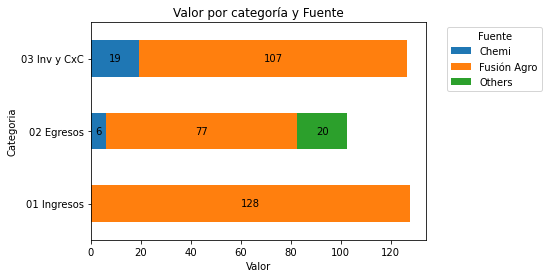

In [1866]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df1_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df1_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


In [1867]:
#df2_ Análisis de Egresos por Tipo de empresa y fuente
# Zoom in en Egresos

In [1868]:
#Filtros

# Considera Únicamente Egresos
df2_ = df_merged[df_merged['Categoria'].isin(['02 Egresos'])]


In [1869]:
df2_ = df2_.groupby(['Fuente','Tipo_empresa'])['Valor (M)'].sum().reset_index()

In [1870]:
# pivot the table to put the "Category" values as columns
df2_ = df2_.pivot(index='Fuente', columns='Tipo_empresa', values='Valor (M)')
df2_ = df2_.fillna(0)

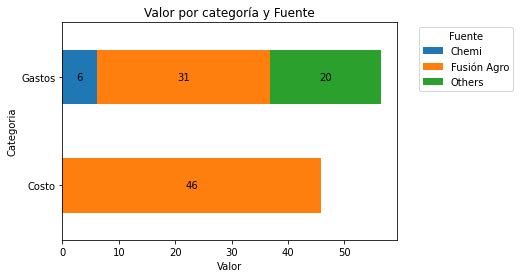

In [1871]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df2_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df2_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


In [1872]:
#df3_ = Análisis de tipo de gasto
#Zoom in en Gasto 

In [1873]:
# Considera Únicamente Gastos
df3_ = df_merged[df_merged['Fuente'].isin(['Gastos'])]

In [1874]:
df3_ = df3_.groupby(['Nivel 2','Tipo_empresa'])['Valor (M)'].sum().reset_index()

In [1875]:
# pivot the table to put the "Category" values as columns
df3_ = df3_.pivot(index='Nivel 2', columns='Tipo_empresa', values='Valor (M)')
df3_ = df3_.fillna(0)

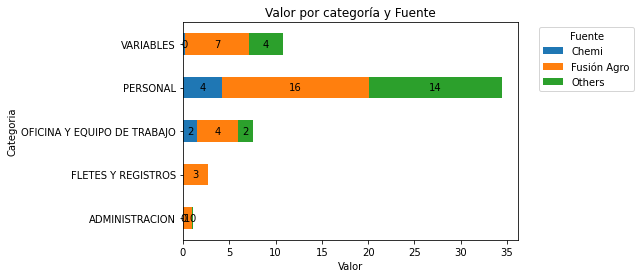

In [1876]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df3_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df3_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


In [1877]:
#df3_ = Análisis de Ingresos
#Zoom in Ingresos

In [1878]:
df_merged.Fuente.unique()

array(['Ventas', 'Utilidad', 'Inventario', 'Cartera_vencida', 'Gastos',
       'Pendiente', 'Costo', 'Inventario_IQC', 'Cartera_corriente', 'CxP',
       'Solicitado', 'F 2Q U', 'F 2Q V', 'Cobranza', 'Flujo',
       'Ventas_PDN_23', 'Utilidad_PDN_23', 'Utilidad_PDN_23_'],
      dtype=object)

In [1879]:
df4_ = df_merged[df_merged['Fuente'].isin(['Utilidad','Ventas'])]

In [1880]:
df4_ = df4_.groupby(['Fuente','Empresa'])['Valor (M)'].sum().reset_index()

In [1881]:
# pivot the table to put the "Category" values as columns
df4_ = df4_.pivot(index='Fuente', columns='Empresa', values='Valor (M)')
df4_ = df4_.fillna(0)

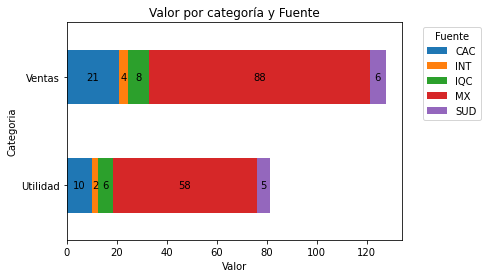

In [1882]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df4_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df4_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


In [1883]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
Utilidad['Valor (M)'] = Utilidad['Utilidad'].apply(lambda x: x / 1000000)

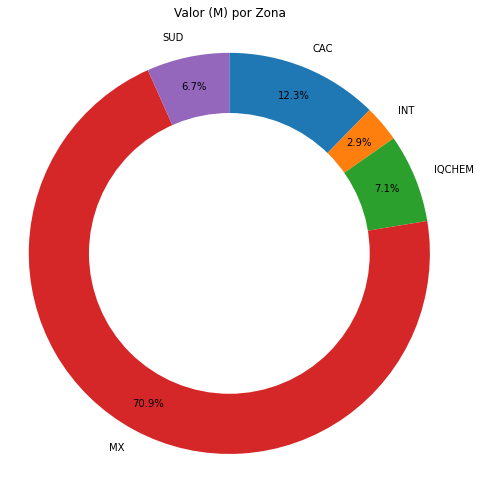

In [1884]:
# Group data by Nivel 2 and calculate the sum of Valor (M)
df4_2 = Utilidad.groupby(['Empresa'])['Valor (M)'].sum()

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df4_2, labels=df4_2.index, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por Zona', pad=20)
plt.savefig('df4_2.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1885]:
Utilidad_total_grupo =  df_merged[df_merged['Fuente'].isin(['Utilidad'])]['Valor (M)'].sum()

In [1886]:
Ventas_total_grupo = df_merged[df_merged['Fuente'].isin(['Ventas'])]['Valor (M)'].sum()

In [1887]:
Factor_costo_ventas = 1-Utilidad_total_grupo/Ventas_total_grupo

In [1888]:
Utilidad_total_por_empresa = df_merged[df_merged['Fuente'].isin(['Utilidad'])].groupby(['Empresa'])['Valor (M)'].sum()

In [1889]:
Ventas_total_por_empresa = df_merged[df_merged['Fuente'].isin(['Ventas'])].groupby(['Empresa'])['Valor (M)'].sum()

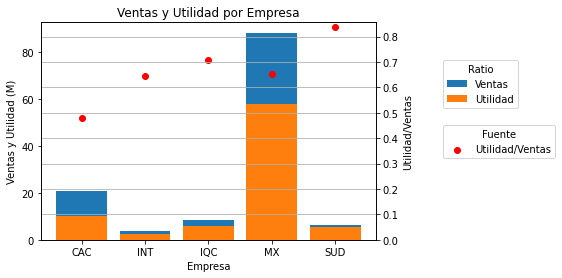

In [1890]:


# create the data for the bar plot
ventas = df_merged[df_merged['Fuente'].isin(['Ventas'])].groupby(['Empresa'])['Valor (M)'].sum()
utilidad = df_merged[df_merged['Fuente'].isin(['Utilidad'])].groupby(['Empresa'])['Valor (M)'].sum()

# calculate the Utilidad/Ventas ratios
utilidad_ventas = utilidad / ventas

# create the figure and axes objects
fig, ax1 = plt.subplots()

# create the bar plot on the primary y-axis
ax1.bar(ventas.index, ventas, label='Ventas')
ax1.bar(utilidad.index, utilidad, label='Utilidad')

# set the axis labels and title for the primary y-axis
ax1.set_xlabel('Empresa')
ax1.set_ylabel('Ventas y Utilidad (M)')
ax1.set_title('Ventas y Utilidad por Empresa')

# move the legend outside of the plot
ax1.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

# create a second y-axis for the Utilidad/Ventas ratios
ax2 = ax1.twinx()

# plot the Utilidad/Ventas ratios as a scatter plot on the secondary y-axis
ax2.scatter(utilidad_ventas.index, utilidad_ventas, color='red', label='Utilidad/Ventas')

# set the axis labels and title for the secondary y-axis
ax2.set_ylabel('Utilidad/Ventas')
ax2.set_ylim(bottom=0)
ax2.grid(None)

# move the legend outside of the plot
ax2.legend(title='Fuente', bbox_to_anchor=(1.55, 0.55))
ax1.legend(title='Ratio', bbox_to_anchor=(1.44, 0.85))
plt.savefig('df4_3.jpeg', dpi = 200, bbox_inches = 'tight')
plt.show()


In [1891]:
utilidad

Empresa
CAC    10.039051
INT     2.402040
IQC     5.818878
MX     57.782734
SUD     5.420530
Name: Valor (M), dtype: float64

In [1892]:
#df5
#Nivel 2 por empresa
#Zoom in a tipo de productos o categorías

In [1893]:
df5_ = Utilidad.groupby(['Nivel 2','Zona'])['Valor (M)'].sum().reset_index()

In [1894]:
df5_ = df5_.pivot(index='Zona', columns='Nivel 2', values='Valor (M)')


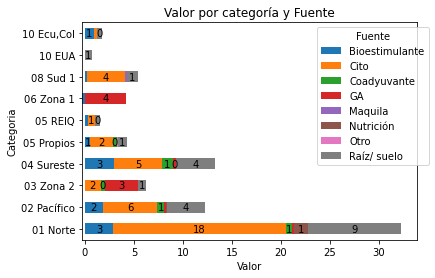

In [1895]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df5_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df5_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


In [1896]:
Utilidad.columns

Index([         'RETENUM',          'Empresa',             'Zona',
                     'RM',          'Cultivo',             'Item',
            ''Base'[Mes]',         'Utilidad',             'Plan',
                  'PlanN', 'Producto_Ranking',          'Nivel 2',
                        0,        'Valor (M)',         'Empresa_',
                   'Cat_'],
      dtype='object')

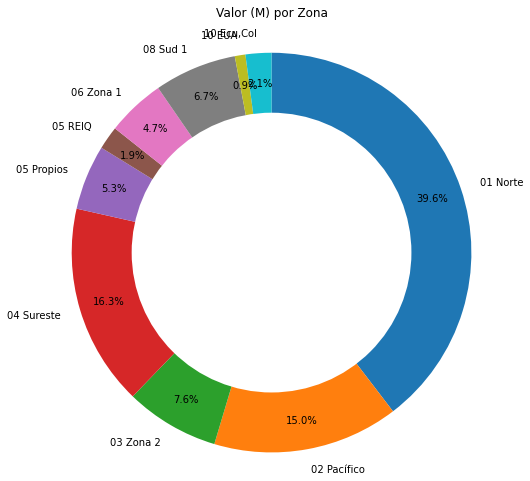

In [1897]:
# Group data by Nivel 2 and calculate the sum of Valor (M)
df5_4 = Utilidad.groupby(['Zona'])['Valor (M)'].sum()

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df5_4, labels=df5_4.index, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por Zona', pad=20)
plt.savefig('df5_4.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1898]:
Utilidad['Empresa_'] = Utilidad['Empresa'].map({'CAC': 'INT', 'MX': 'MX', 'SUD': 'INT', 'INT': 'INT', 'IQCHEM': 'IQC'})
Utilidad['Cat_'] = Utilidad['Nivel 2'].map({'GA': 'GA', 'Cito': 'Cito', 'Raíz/ suelo': 'Raíz/ suelo', 'Nutrición': 'Otro', 'Coadyuvante': 'Otro','Maquila':'Otro','Bioestimulante':'Bioestimulante'})


In [1899]:
df5_2 = Utilidad.groupby(['Cat_','Empresa_'])['Valor (M)'].sum().reset_index()

In [1900]:
df5_2 = df5_2.pivot(index='Empresa_', columns='Cat_', values='Valor (M)')


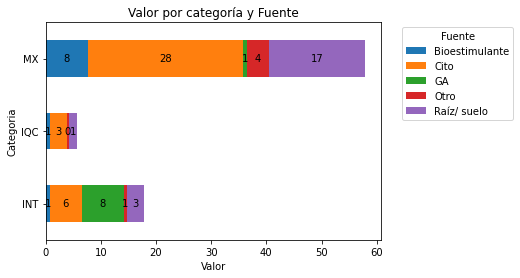

In [1901]:
# Stacked bar

# create a horizontal stacked bar plot
ax = df5_2.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df5_2.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

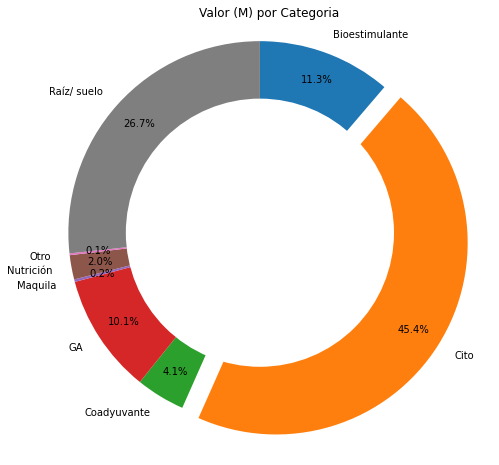

In [1902]:

# Group data by Nivel 2 and calculate the sum of Valor (M)
data = Utilidad.groupby(['Nivel 2'])['Valor (M)'].sum()

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85, explode=[0.1 if i=='Cito' else 0 for i in data.index])

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por Categoria')
plt.savefig('df5_3.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1903]:
#Cap de trabajo

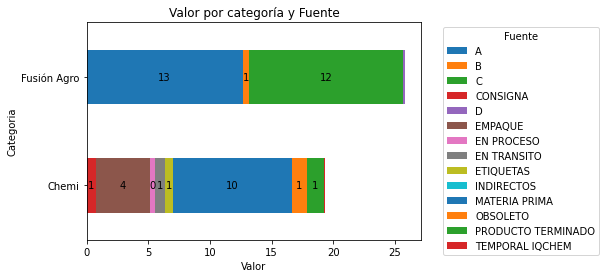

In [1904]:

#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df7_ = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC'])]

#Group by
df7_ = df7_.groupby(['Tipo_empresa','Nivel 2'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df7_ = df7_.pivot(index='Tipo_empresa', columns='Nivel 2', values='Valor (M)')
df7_ = df7_.fillna(0)

# create a horizontal stacked bar plot
ax = df7_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df7_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

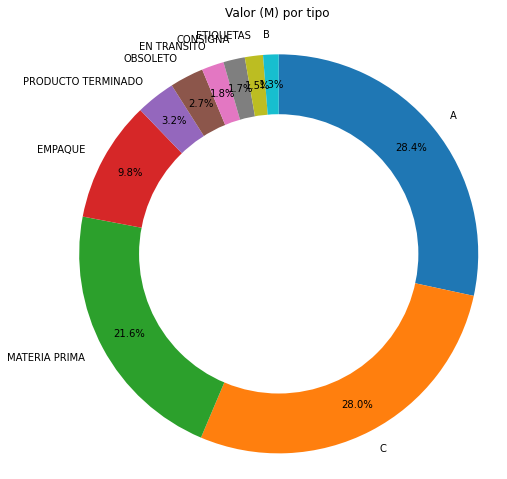

In [1905]:

# Group data by Nivel 2 and calculate the sum of Valor (M)
df7_2 = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC'])].groupby(['Nivel 2'])['Valor (M)'].sum().sort_values(ascending = False)

# Get the top 10 labels and values
top_10_labels = df7_2.index[:10]
top_10_values = df7_2[:10]

# Create the donut chart with only the top 10 labels
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_10_values, labels=top_10_labels, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por tipo', pad=20)
plt.savefig('df7_2.png', dpi = 300, bbox_inches = 'tight')

plt.show()


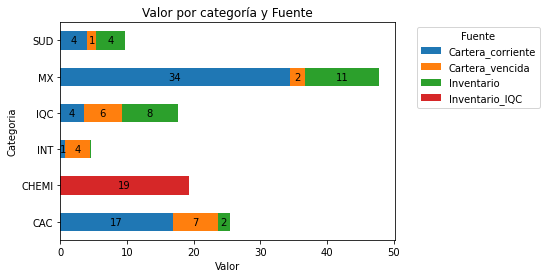

In [1906]:

#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df8_ = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC','Cartera_vencida','Cartera_corriente'])]

#Group by
df8_ = df8_.groupby(['Empresa','Fuente'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df8_ = df8_.pivot(index='Empresa', columns='Fuente', values='Valor (M)')
df8_ = df8_.fillna(0)

# create a horizontal stacked bar plot
ax = df8_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df8_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

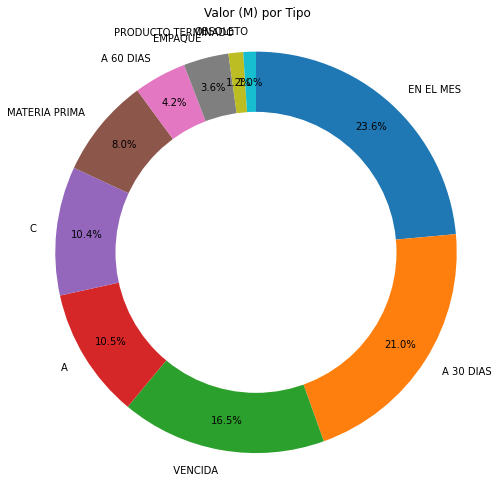

In [1907]:

# Group data by Nivel 2 and calculate the sum of Valor (M)
df8_2 = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC','Cartera_vencida','Cartera_corriente'])].groupby(['Nivel 2'])['Valor (M)'].sum().sort_values(ascending = False)

# Get the top 10 labels and values
top_10_labels = df8_2.index[:10]
top_10_values = df8_2[:10]

# Create the donut chart with only the top 10 labels
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_10_values, labels=top_10_labels, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por Tipo', pad=20)
plt.savefig('df8_2.png', dpi = 300, bbox_inches = 'tight')

plt.show()

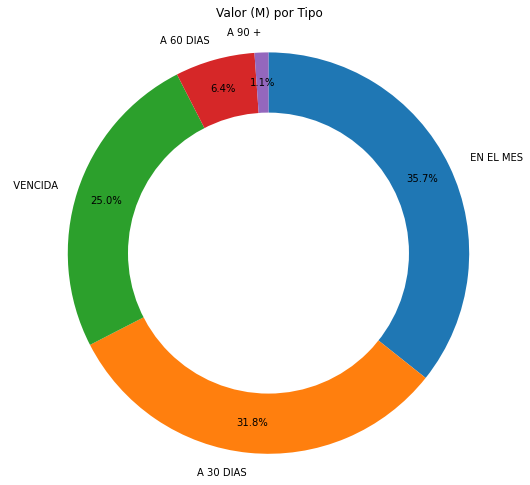

In [1908]:
# Group data by Nivel 2 and calculate the sum of Valor (M)
df8_3 = df_merged[df_merged['Fuente'].isin(['Cartera_vencida','Cartera_corriente'])].groupby(['Nivel 2'])['Valor (M)'].sum().sort_values(ascending = False)

# Get the top 10 labels and values
top_10_labels = df8_3.index[:10]
top_10_values = df8_3[:10]

# Create the donut chart with only the top 10 labels
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top_10_values, labels=top_10_labels, autopct='%1.1f%%', startangle=90,
       counterclock=False, pctdistance=0.85)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle
ax.axis('equal')
plt.title('Valor (M) por Tipo', pad=20)
plt.savefig('df8_3.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1909]:
df_merged.columns

Index(['Empresa', 'Nivel 2', 'Valor', 'Fuente', 'Categoria', 'Tipo_empresa',
       'Valor (M)'],
      dtype='object')

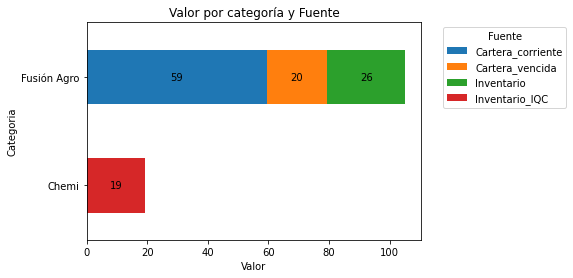

In [1910]:
#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df9_ = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC','Cartera_vencida','Cartera_corriente'])]

#Group by
df9_ = df9_.groupby(['Tipo_empresa','Fuente'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df9_ = df9_.pivot(index='Tipo_empresa', columns='Fuente', values='Valor (M)')
df9_ = df9_.fillna(0)

# create a horizontal stacked bar plot
ax = df9_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df9_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

In [1911]:
#Cap de trabajo

In [1912]:
df_merged.Fuente.unique()

array(['Ventas', 'Utilidad', 'Inventario', 'Cartera_vencida', 'Gastos',
       'Pendiente', 'Costo', 'Inventario_IQC', 'Cartera_corriente', 'CxP',
       'Solicitado', 'F 2Q U', 'F 2Q V', 'Cobranza', 'Flujo',
       'Ventas_PDN_23', 'Utilidad_PDN_23', 'Utilidad_PDN_23_'],
      dtype=object)

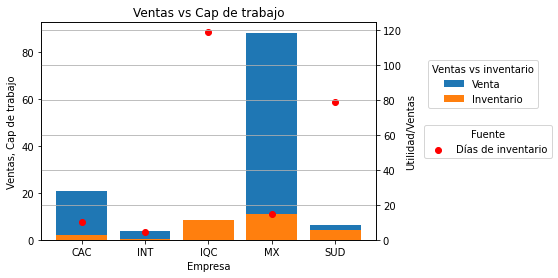

In [1913]:
df10_ = df_merged[df_merged['Fuente'].isin(['Inventario','Ventas'])]

# create the data for the bar plot
Cap_de_trab = df10_[df10_['Categoria'].isin(['03 Inv y CxC'])].groupby(['Empresa'])['Valor (M)'].sum()
Venta = df10_[df10_['Categoria'].isin(['01 Ingresos'])].groupby(['Empresa'])['Valor (M)'].sum()

# calculate the Utilidad/Ventas ratios
Dias = (Cap_de_trab / Venta)*117

# create the figure and axes objects
fig, ax1 = plt.subplots()

# create the bar plot on the primary y-axis
ax1.bar(Venta.index, Venta, label='Venta')
ax1.bar(Cap_de_trab.index, Cap_de_trab, label='Inventario')

# create a second y-axis for the Utilidad/Ventas ratios
ax2 = ax1.twinx()

# plot the Utilidad/Ventas ratios as a scatter plot on the secondary y-axis
ax2.scatter(Dias.index, Dias, color='red', label='Días de inventario')

# set the axis labels and title for the primary y-axis
ax1.set_xlabel('Empresa')
ax1.set_ylabel('Ventas, Cap de trabajo')
ax1.set_title('Ventas vs Cap de trabajo')

# move the legend outside of the plot
ax1.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

# set the axis labels and title for the secondary y-axis
ax2.set_ylabel('Utilidad/Ventas')
ax2.set_ylim(bottom=0)
ax2.grid(None)

# move the legend outside of the plot
ax2.legend(title='Fuente', bbox_to_anchor=(1.54, 0.55))
ax1.legend(title='Ventas vs inventario', bbox_to_anchor=(1.5, 0.85))
plt.savefig('df10_.png', dpi = 300, bbox_inches = 'tight')

plt.show()

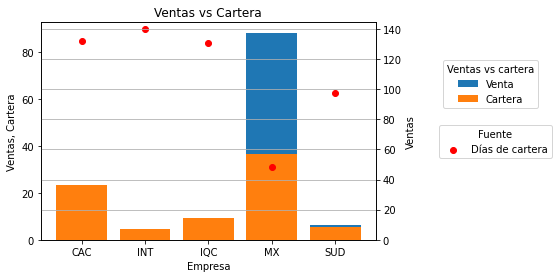

In [1914]:
#Días de cartera
df11_ = df_merged[df_merged['Fuente'].isin(['Cartera_vencida','Cartera_corriente','Ventas'])]

# create the data for the bar plot
Cap_de_trab = df11_[df11_['Categoria'].isin(['03 Inv y CxC'])].groupby(['Empresa'])['Valor (M)'].sum()
Venta = df10_[df10_['Categoria'].isin(['01 Ingresos'])].groupby(['Empresa'])['Valor (M)'].sum()

# calculate the Utilidad/Ventas ratios
Dias = (Cap_de_trab / Venta)*117

# create the figure and axes objects
fig, ax1 = plt.subplots()

# create the bar plot on the primary y-axis
ax1.bar(Venta.index, Venta, label='Venta')
ax1.bar(Cap_de_trab.index, Cap_de_trab, label='Cartera')

# create a second y-axis for the Utilidad/Ventas ratios
ax2 = ax1.twinx()

# plot the Utilidad/Ventas ratios as a scatter plot on the secondary y-axis
ax2.scatter(Dias.index, Dias, color='red', label='Días de cartera')

# set the axis labels and title for the primary y-axis
ax1.set_xlabel('Empresa')
ax1.set_ylabel('Ventas, Cartera')
ax1.set_title('Ventas vs Cartera')

# move the legend outside of the plot
ax1.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

# set the axis labels and title for the secondary y-axis
ax2.set_ylabel('Ventas')
ax2.set_ylim(bottom=0)
ax2.grid(None)

# move the legend outside of the plot
ax2.legend(title='Fuente', bbox_to_anchor=(1.54, 0.55))
ax1.legend(title='Ventas vs cartera', bbox_to_anchor=(1.5, 0.85))
plt.savefig('df11_.png', dpi = 300, bbox_inches = 'tight')

plt.show()

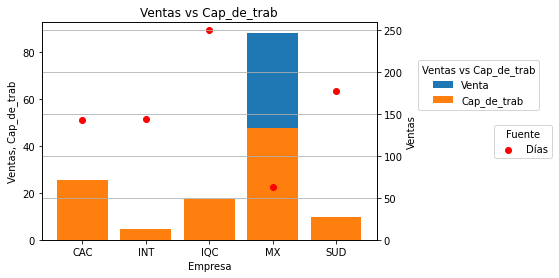

In [1915]:
df12_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Ventas'])]

# create the data for the bar plot
Cap_de_trab = df12_[df12_['Categoria'].isin(['03 Inv y CxC'])].groupby(['Empresa'])['Valor (M)'].sum()
Venta = df12_[df12_['Categoria'].isin(['01 Ingresos'])].groupby(['Empresa'])['Valor (M)'].sum()

# calculate the Utilidad/Ventas ratios
Dias = (Cap_de_trab / Venta)*117

# create the figure and axes objects
fig, ax1 = plt.subplots()

# create the bar plot on the primary y-axis
ax1.bar(Venta.index, Venta, label='Venta')
ax1.bar(Cap_de_trab.index, Cap_de_trab, label='Cap_de_trab')

# create a second y-axis for the Utilidad/Ventas ratios
ax2 = ax1.twinx()

# plot the Utilidad/Ventas ratios as a scatter plot on the secondary y-axis
ax2.scatter(Dias.index, Dias, color='red', label='Días')

# set the axis labels and title for the primary y-axis
ax1.set_xlabel('Empresa')
ax1.set_ylabel('Ventas, Cap_de_trab')
ax1.set_title('Ventas vs Cap_de_trab')

# move the legend outside of the plot
ax1.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

# set the axis labels and title for the secondary y-axis
ax2.set_ylabel('Ventas')
ax2.set_ylim(bottom=0)
ax2.grid(None)

# move the legend outside of the plot
ax2.legend(title='Fuente', bbox_to_anchor=(1.54, 0.55))
ax1.legend(title='Ventas vs Cap_de_trab', bbox_to_anchor=(1.5, 0.85))
plt.savefig('df12_.png', dpi = 300, bbox_inches = 'tight')

plt.show()

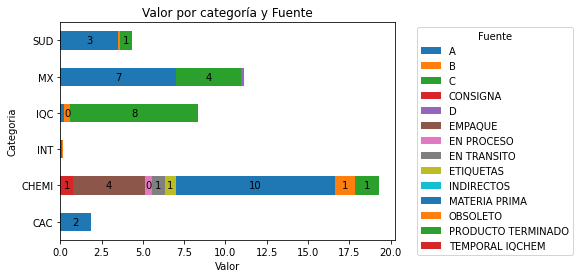

In [1916]:

#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df13_ = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC'])]

#Group by
df13_ = df13_.groupby(['Empresa','Nivel 2'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df13_ = df13_.pivot(index='Empresa', columns='Nivel 2', values='Valor (M)')
df13_ = df13_.fillna(0)

# create a horizontal stacked bar plot
ax = df13_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df13_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

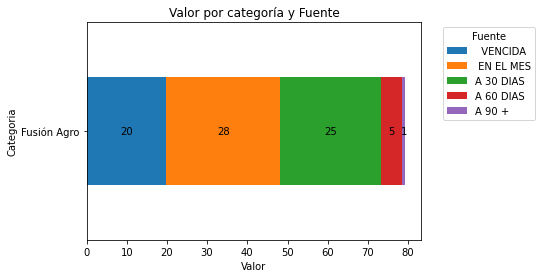

In [1917]:
#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df14_ = df_merged[df_merged['Fuente'].isin(['Cartera_vencida','Cartera_corriente'])]

#Group by
df14_ = df14_.groupby(['Tipo_empresa','Nivel 2'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df14_ = df14_.pivot(index='Tipo_empresa', columns='Nivel 2', values='Valor (M)')
df14_ = df14_.fillna(0)

# create a horizontal stacked bar plot
ax = df14_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df14_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

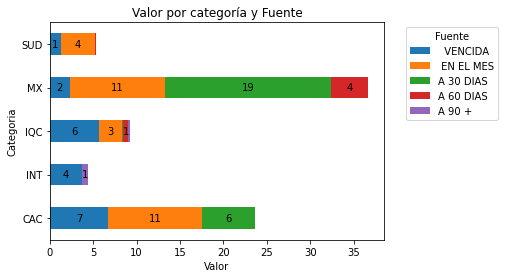

In [1918]:
#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df15_ = df_merged[df_merged['Fuente'].isin(['Cartera_vencida','Cartera_corriente'])]

#Group by
df15_ = df15_.groupby(['Empresa','Nivel 2'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df15_ = df15_.pivot(index='Empresa', columns='Nivel 2', values='Valor (M)')
df15_ = df15_.fillna(0)

# create a horizontal stacked bar plot
ax = df15_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df15_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

In [1919]:


# move the legend outside of the plot
ax1.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

# create a second y-axis for the Utilidad/Ventas ratios
ax2 = ax1.twinx()

# plot the Utilidad/Ventas ratios as a scatter plot on the secondary y-axis
ax2.scatter(utilidad_ventas.index, utilidad_ventas, color='red', label='Utilidad/Ventas')

# set the axis labels and title for the secondary y-axis
ax2.set_ylabel('Utilidad/Ventas')
ax2.set_ylim(bottom=0)
ax2.grid(None)

# move the legend outside of the plot
ax2.legend(title='Fuente', bbox_to_anchor=(1.55, 0.55))
ax1.legend(title='Ratio', bbox_to_anchor=(1.44, 0.85))
plt.savefig('df4_aux.png', dpi = 300, bbox_inches = 'tight')

plt.show()

<Figure size 432x288 with 0 Axes>

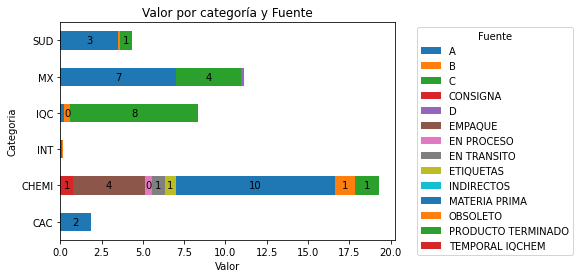

In [1920]:
#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Inventario_IQC'])]

#Group by
df6_ = df6_.groupby(['Empresa','Nivel 2'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df6_ = df6_.pivot(index='Empresa', columns='Nivel 2', values='Valor (M)')
df6_ = df6_.fillna(0)

# create a horizontal stacked bar plot
ax = df6_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df6_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

### Filtros

In [1921]:
#Filtros
#df16_ = df_merged[df_merged['Fuente'].isin(['Ventas', 'Costo', 'Utilidad', 'Gastos', 'Inventario', 'Inventario_IQC', 'Pendiente', 'Cartera_corriente', 'Cartera_vencida', 'CxP','F 2Q V','F 2Q U'])]
#df16_ = df_merged[df_merged['Fuente'].isin(['Ventas', 'Utilidad','F 2Q V','F 2Q U'])]
#df_merged_resumen = df_merged_resumen[df_merged_resumen['Empresa'].isin(['CAC', 'INT', 'IQC', 'MX', 'SUD', 'CHEMI', 'LASA', 'RETENUM','SACH'])]
#df_merged_resumen = df_merged_resumen[~df_merged_resumen['Categoria'].isin(['Flujo', 'Sol','F 2Q U', 'F 2Q V'])]
#df_merged_resumen = df_merged_resumen[~df_merged_resumen['Fuente'].isin(['Utilidad'])]
#df_merged_resumen = df_merged_resumen[~df_merged_resumen['Nivel 2'].isin(['Sol', 'F 2Q U','F 2Q V'])]
#df_merged_resumen = df_merged_resumen[df_merged_resumen['Valor']>0]


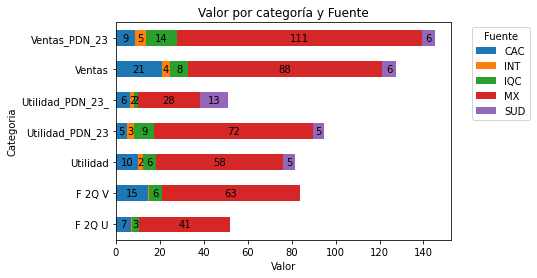

In [1922]:
#df6_ = df_merged[df_merged['Fuente'].isin(['Inventario','Cartera_vencida','Cartera_corriente','Inventario_IQC','Pendiente'])]
df16_ = df_merged[df_merged['Fuente'].isin(['Ventas', 'Utilidad','F 2Q V','F 2Q U','Ventas_PDN_23','Utilidad_PDN_23','Utilidad_PDN_23_'])]

#Group by
df16_ = df16_.groupby(['Fuente','Empresa'])['Valor (M)'].sum().reset_index()

# pivot the table to put the "Category" values as columns
df16_ = df16_.pivot(index='Fuente', columns='Empresa', values='Valor (M)')
df16_ = df16_.fillna(0)

# create a horizontal stacked bar plot
ax = df16_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0.3:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df16_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()

In [1923]:
df_merged.Fuente.unique()

array(['Ventas', 'Utilidad', 'Inventario', 'Cartera_vencida', 'Gastos',
       'Pendiente', 'Costo', 'Inventario_IQC', 'Cartera_corriente', 'CxP',
       'Solicitado', 'F 2Q U', 'F 2Q V', 'Cobranza', 'Flujo',
       'Ventas_PDN_23', 'Utilidad_PDN_23', 'Utilidad_PDN_23_'],
      dtype=object)

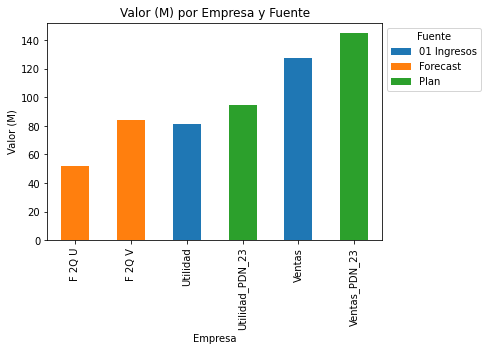

In [1924]:

df17_ = df_merged[df_merged['Fuente'].isin(['Ventas', 'Utilidad','F 2Q V','F 2Q U','Ventas_PDN_23','Utilidad_PDN_23'])]

# group by "Component" and "Category", format the "Value" column as currency, and sum the values
df17_ = df17_.groupby(['Categoria', 'Fuente'])['Valor (M)'].apply(lambda x: x.sum()).reset_index()

# pivot the table to put the "Category" values as columns
df17_ = df17_.pivot(index='Fuente', columns='Categoria', values='Valor (M)')
df17_ = df17_.fillna(0)
# create a stacked bar plot of the DataFrame
ax = df17_.plot.bar(stacked=True)

# customize the plot labels and legend
ax.set_xlabel('Empresa')
ax.set_ylabel('Valor (M)')
ax.set_title('Valor (M) por Empresa y Fuente')
ax.legend(title='Fuente', bbox_to_anchor=(1.0, 1.0))
plt.savefig('df17_.png', dpi = 300, bbox_inches = 'tight')
plt.show()

#### Egresos, Cap de trabajo y Ingresos del Grupo

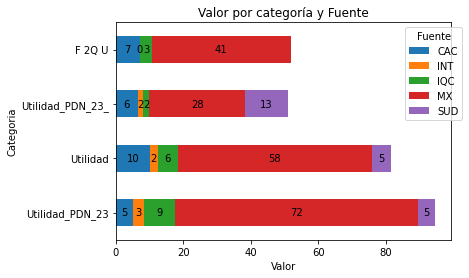

In [1925]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
df18_ = df_merged[df_merged['Fuente'].isin(['Utilidad','F 2Q U','Utilidad_PDN_23','Utilidad_PDN_23_'])]

df18_ = df18_.groupby(['Empresa', 'Fuente'])['Valor (M)'].sum().reset_index().set_index('Fuente')

#row_order Fus Agro = ['Ventas', 'Costo', 'Utilidad', 'Gastos', 'Inventario','Pendiente','Cartera_corriente','Cartera_vencida','CxP']
row_order = ['Utilidad_PDN_23', 'Utilidad','Utilidad_PDN_23_', 'F 2Q U']

# sort the DataFrame based on the row order
df18_ = df18_.loc[row_order]

# pivot the table to put the "Category" values as columns
df18_ = df18_.reset_index().pivot(index='Fuente', columns='Empresa', values='Valor (M)')
df18_ = df18_.fillna(0)

# sort the DataFrame based on the row order
df18_ = df18_.loc[row_order]

# Stacked bar

# create a horizontal stacked bar plot
ax = df18_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df18_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


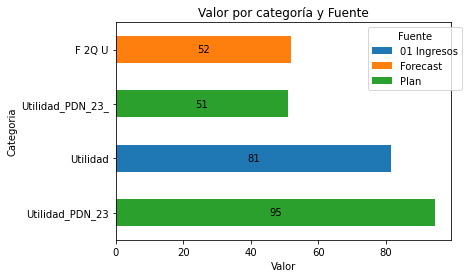

In [1926]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
df19_ = df_merged[df_merged['Fuente'].isin(['Utilidad','F 2Q U','Utilidad_PDN_23','Utilidad_PDN_23_'])]

df19_ = df19_.groupby(['Categoria', 'Fuente'])['Valor (M)'].sum().reset_index().set_index('Fuente')

#row_order Fus Agro = ['Ventas', 'Costo', 'Utilidad', 'Gastos', 'Inventario','Pendiente','Cartera_corriente','Cartera_vencida','CxP']
row_order = ['Utilidad_PDN_23', 'Utilidad','Utilidad_PDN_23_', 'F 2Q U']

# sort the DataFrame based on the row order
df19_ = df19_.loc[row_order]

# pivot the table to put the "Category" values as columns
df19_ = df19_.reset_index().pivot(index='Fuente', columns='Categoria', values='Valor (M)')
df19_ = df19_.fillna(0)

# sort the DataFrame based on the row order
df19_ = df19_.loc[row_order]

# Stacked bar

# create a horizontal stacked bar plot
ax = df19_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df19_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


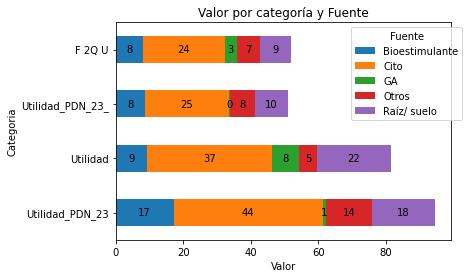

In [1927]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
df20_ = df_merged[df_merged['Fuente'].isin(['Utilidad','F 2Q U','Utilidad_PDN_23','Utilidad_PDN_23_'])]

df20_ = df20_.groupby(['Nivel 2', 'Fuente'])['Valor (M)'].sum().reset_index().set_index('Fuente')

#row_order Fus Agro = ['Ventas', 'Costo', 'Utilidad', 'Gastos', 'Inventario','Pendiente','Cartera_corriente','Cartera_vencida','CxP']
row_order = ['Utilidad_PDN_23', 'Utilidad','Utilidad_PDN_23_', 'F 2Q U']

# sort the DataFrame based on the row order
df20_ = df20_.loc[row_order]

# pivot the table to put the "Category" values as columns
df20_ = df20_.reset_index().pivot(index='Fuente', columns='Nivel 2', values='Valor (M)')
df20_ = df20_.fillna(0)

# sort the DataFrame based on the row order
df20_ = df20_.loc[row_order]

# Stacked bar

# create a horizontal stacked bar plot
ax = df20_.plot(kind='barh', stacked=True)

# set the axis labels and title
ax.set_xlabel('Valor')
ax.set_ylabel('Categoria')
ax.set_title('Valor por categoría y Fuente')

# add labels to the bars
for i, patch in enumerate(ax.patches):
    # get the x position of the center of the bar
    x = patch.get_x() + patch.get_width() / 2
    # get the y position of the center of the bar
    y = patch.get_y() + patch.get_height() / 2
    # get the value of the bar
    value = patch.get_width()
    # add the value as a label to the bar
    if value > 0:
        ax.text(x, y, f'{value:.0f}', ha='center', va='center')

# move the legend outside of the plot
ax.legend(title='Fuente', bbox_to_anchor=(1.05, 1))

#Guardar imagen
plt.savefig('df20_.png', dpi = 300, bbox_inches = 'tight')

# display the plot
plt.show()


#### Componentes críticos de estado de resultados

In [1928]:
### Resumen de categorías consideradas

In [1929]:
df_merged.Categoria.unique()

array(['01 Ingresos', '03 Inv y CxC', '02 Egresos', 'Flujo', 'Sol',
       'Forecast', 'Plan'], dtype=object)

In [1930]:
# create a dictionary to map the old values to the new values
fuente_dict = {'Ventas': 'Vent', 'Utilidad': 'Uti', 'Inventario': 'Inv', 'Cartera_vencida': 'Cart Ok', 'Gastos': 'Gasto', 'Pendiente': 'PPE', 'Costo': 'Cost', 'Inventario_IQC': 'Inv IQC', 'Cartera_corriente': 'Cart Ok', 'CxP': 'CxP', 'Solicitado':'Sol','F 2Q U':'F 2Q U','F 2Q V':'F 2Q V', 'Cobranza':'C $', 'Flujo': 'F$', 'Ventas_PDN_23': 'V PDN 23','Utilidad_PDN_23':'U PDN 23','Utilidad_PDN_23_':'U PDN 23_'}
fuente_dict_ = {'01 Ingresos': 'Ut y V', '02 Egresos': 'Egr', '03 Inv y CxC': 'Inv y CxC', 'Sol':'S', 'Plan':'PDN'}

# replace the old values with the new values using the dictionary
df_merged['Fuente'] = df_merged['Fuente'].replace(fuente_dict)
df_merged['Categoria'] = df_merged['Categoria'].replace(fuente_dict_)

Detalle = df_merged.groupby(['Fuente', 'Nivel 2','Categoria'])['Valor (M)'].apply(lambda x: x.sum()).reset_index()

# pivot the table to put the "Category" values as columns
Detalle_ = Detalle.pivot(index=['Fuente','Nivel 2'], columns='Categoria', values='Valor (M)')

Detalle_ = Detalle_.fillna(0)
# format the currency columns
for col in Detalle_.columns:
    Detalle_[col] = Detalle_[col].apply(lambda x: "${:,.1f}".format(x))

# print the result
print(Detalle_.head(60))
Detalle_.to_csv('Resumen_comp_financieros.csv')

Categoria                               Egr  Flujo Forecast Inv y CxC    PDN  \
Fuente   Nivel 2                                                               
Cart Ok    VENCIDA                     $0.0   $0.0     $0.0     $19.9   $0.0   
          EN EL MES                    $0.0   $0.0     $0.0     $28.3   $0.0   
         A 30 DIAS                     $0.0   $0.0     $0.0     $25.2   $0.0   
         A 60 DIAS                     $0.0   $0.0     $0.0      $5.1   $0.0   
         A 90 +                        $0.0   $0.0     $0.0      $0.9   $0.0   
Cost     Bioestimulante                $9.1   $0.0     $0.0      $0.0   $0.0   
         Cito                          $9.2   $0.0     $0.0      $0.0   $0.0   
         GA                           $10.7   $0.0     $0.0      $0.0   $0.0   
         Otros                         $6.9   $0.0     $0.0      $0.0   $0.0   
         Raíz/ suelo                  $10.0   $0.0     $0.0      $0.0   $0.0   
CxP      CONSUMIBLES                   $

In [1931]:
##Resumen de categorías por empresa

In [1932]:
# group by "Component" and "Category", format the "Value" column as currency, and sum the values
Componentes_p_Emp = df_merged.groupby(['Fuente', 'Empresa'])['Valor (M)'].apply(lambda x: x.sum()).reset_index()

# pivot the table to put the "Category" values as columns
Componentes_p_Emp_ = Componentes_p_Emp.pivot(index='Empresa', columns='Fuente', values='Valor (M)')

In [1933]:


# print the result
Componentes_p_Emp_ = Componentes_p_Emp_.fillna(0)
print(Componentes_p_Emp_)

Fuente         C $    Cart Ok       Cost        CxP     F 2Q U     F 2Q V  \
Empresa                                                                     
CAC      21.345478  23.582924  10.549094   0.948181   6.989904  14.750990   
CHEMI     0.000000   0.000000   0.000000  22.682458   0.000000   0.000000   
INT       1.931925   4.462600   1.334672   0.829204   0.231092   0.271878   
IQC       5.106598   9.224385   2.425165   0.465981   3.397325   5.734612   
LASA      0.000000   0.000000   0.000000   2.661906   0.000000   0.000000   
MX       60.231804  36.680562  30.577875   2.527321  41.156081  63.175090   
RETENUM   0.000000   0.000000   0.000000   9.870136   0.000000   0.000000   
SACH      0.000000   0.000000   0.000000   2.067733   0.000000   0.000000   
SUD      18.669154   5.392579   1.048840   1.596392   0.000000   0.000000   

Fuente          F$      Gasto        Inv    Inv IQC       PPE        Sol  \
Empresa                                                                    


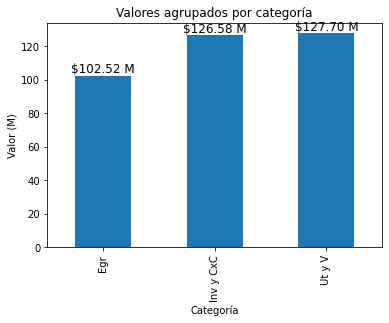

In [1934]:
Intro = df_merged[df_merged['Categoria'].isin(['Ut y V', 'Inv y CxC', 'Egr'])] 
Intro = Intro[~Intro['Fuente'].isin(['Uti'])]

Intro_graph = Intro.groupby('Categoria')['Valor (M)'].sum()

fig, ax = plt.subplots()
Intro_graph.plot(kind='bar', ax=ax)

ax.set_xlabel('Categoría')
ax.set_ylabel('Valor (M)')
ax.set_title('Valores agrupados por categoría')

# Add labels to the bars
for i, v in enumerate(Intro_graph.values):
    ax.text(i, v, "${:,.2f} M".format(v), ha='center', va='bottom', fontsize=12)

plt.subplots_adjust(bottom=0.1)
plt.savefig('Intro_graph.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [1935]:
# Remove Fuente 'Vent'
df_merged = df_merged[df_merged['Fuente'] != 'Vent']
df_merged = df_merged[df_merged['Fuente'] != 'V PDN 23']
df_merged = df_merged[df_merged['Fuente'] != 'F 2Q V']
df_merged = df_merged[df_merged['Categoria'] != 'S']
df_merged = df_merged[df_merged['Fuente']   != 'S']




In [1936]:
df_merged.Fuente.unique()

array(['Uti', 'Inv', 'Cart Ok', 'Gasto', 'PPE', 'Cost', 'Inv IQC', 'CxP',
       'F 2Q U', 'C $', 'F$', 'U PDN 23', 'U PDN 23_'], dtype=object)

In [1937]:
df_merged.groupby(['Fuente'])['Valor'].sum()

Fuente
C $          1.072850e+08
Cart Ok      7.934305e+07
Cost         4.593565e+07
CxP          4.364931e+07
F 2Q U       5.177440e+07
F$           5.613928e+07
Gasto        5.658497e+07
Inv          2.584193e+07
Inv IQC      1.930755e+07
PPE          2.089260e+06
U PDN 23     9.451892e+07
U PDN 23_    5.094568e+07
Uti          8.146323e+07
Name: Valor, dtype: float64

In [1938]:
from matplotlib.ticker import MultipleLocator



# Group by Empresa, Categoria, and Fuente, and aggregate by Valor
df_grouped = df_merged.groupby(['Empresa', 'Categoria', 'Fuente'])['Valor'].sum().reset_index()

# Pivot the data to create a multi-index dataframe
df_pivot = df_grouped.pivot(index=['Empresa', 'Categoria'], columns='Fuente', values='Valor')

# Format the values in millions with 2 decimals
df_pivot = df_pivot.apply(lambda x: x/1000000).round(2)

# Define the order of the companies
company_order = ['MX', 'CAC', 'IQC', 'SUD', 'INT', 'CHEMI', 'RETENUM', 'LASA', 'SACH']




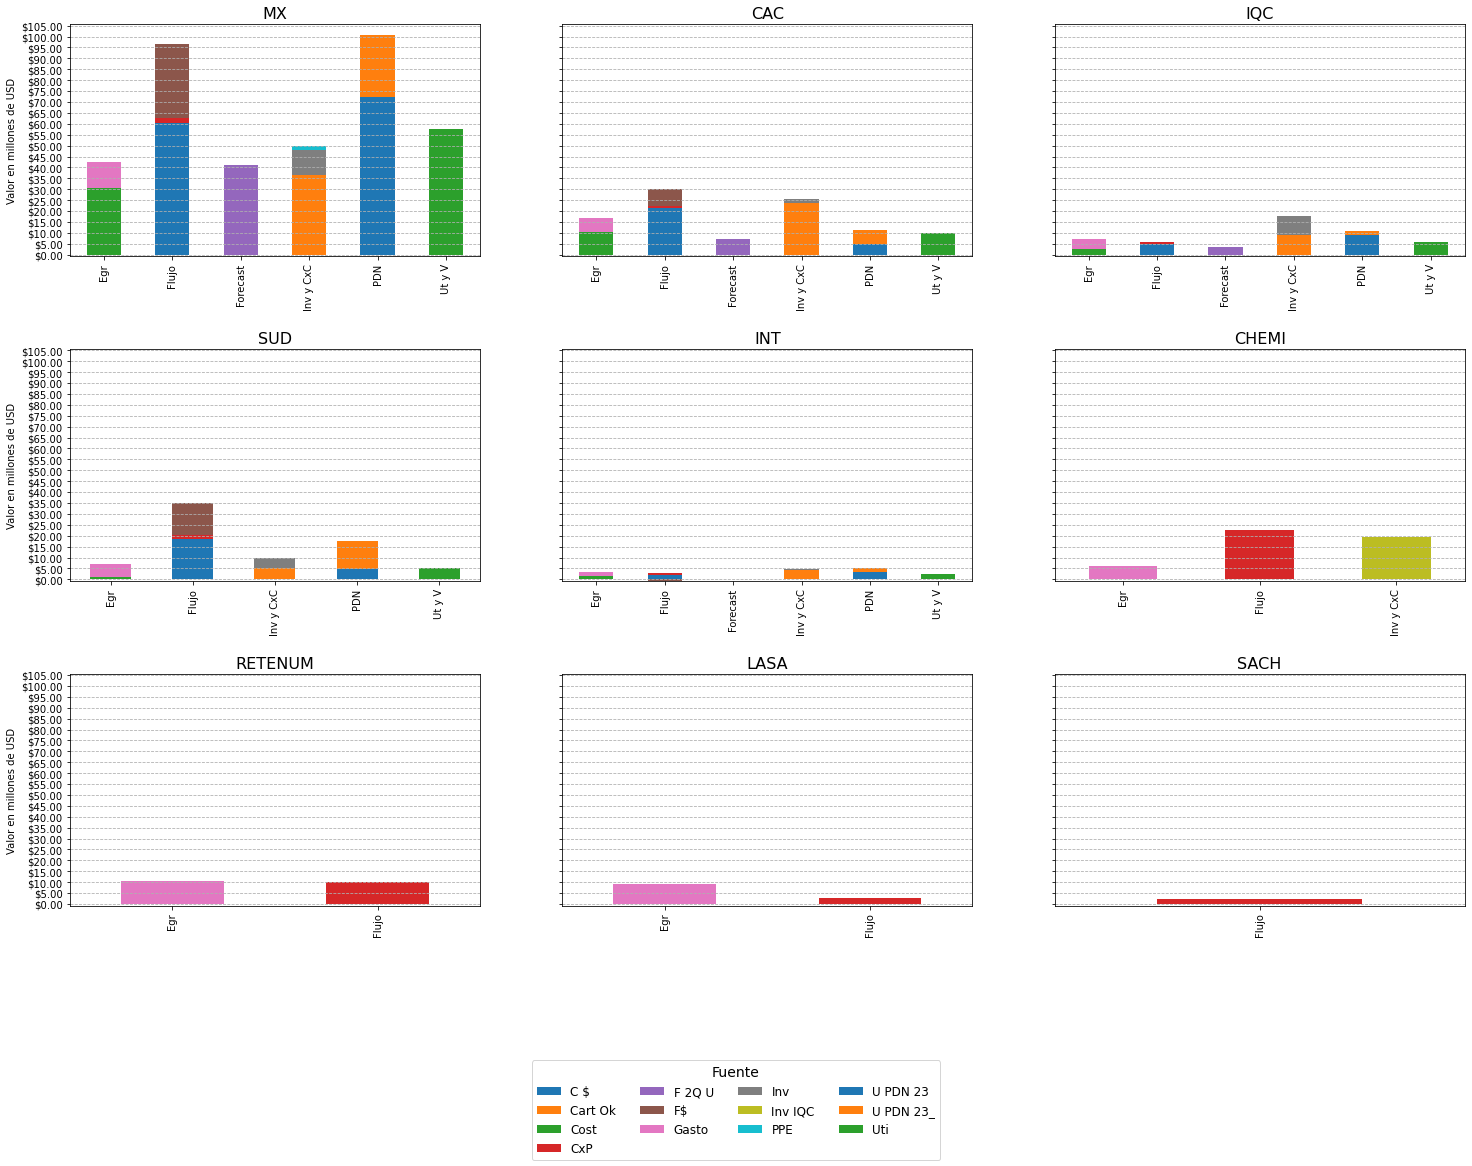

S = Solicitado; Ut y V = Utilidad y Ventas; Egr = Egresos; Inv y Cart = Inventario y Cartera


In [1939]:
import matplotlib as mpl



# Create a figure with subplots for each company
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(25, 18), sharey=True)

# Iterate over each company and subplot
for i, empresa in enumerate(company_order):
    ax = axs.flatten()[i]
    df_pivot.loc[empresa].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(empresa, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('Valor en millones de USD')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.2f}'))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
    ax.grid(axis='y', linestyle='--')
    ax.legend().set_visible(False)
    
# Remove the remaining subplots
for i in range(len(company_order), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])

# Add a subplot for the legend and display it
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=12, title='Fuente', title_fontsize=14)
plt.subplots_adjust(bottom=0.2)    

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4)

# Display the plot
plt.savefig('prueba.png')
plt.show()
print("S = Solicitado; Ut y V = Utilidad y Ventas; Egr = Egresos; Inv y Cart = Inventario y Cartera")



In [1940]:
df_merged['Fuente'].unique()

array(['Uti', 'Inv', 'Cart Ok', 'Gasto', 'PPE', 'Cost', 'Inv IQC', 'CxP',
       'F 2Q U', 'C $', 'F$', 'U PDN 23', 'U PDN 23_'], dtype=object)

In [1941]:
from matplotlib.ticker import MultipleLocator


df21_ = df_merged[df_merged['Fuente'].isin(['Uti','F 2Q U','U PDN 23','U PDN 23_'])]

# Group by Empresa, Categoria, and Fuente, and aggregate by Valor
df21_ = df21_.groupby(['Empresa', 'Fuente', 'Nivel 2'])['Valor'].sum().reset_index()

# Pivot the data to create a multi-index dataframe and reindex the columns
df21_ = df21_.pivot(index=['Empresa', 'Fuente'], columns='Nivel 2', values='Valor')
df21_ = df21_.fillna(0)

In [1942]:
# Format the values in millions with 2 decimals
df21_ = df21_.apply(lambda x: x/1000000).round(2)

# Define the order of the companies
company_order = ['MX', 'CAC', 'IQC', 'SUD', 'INT']

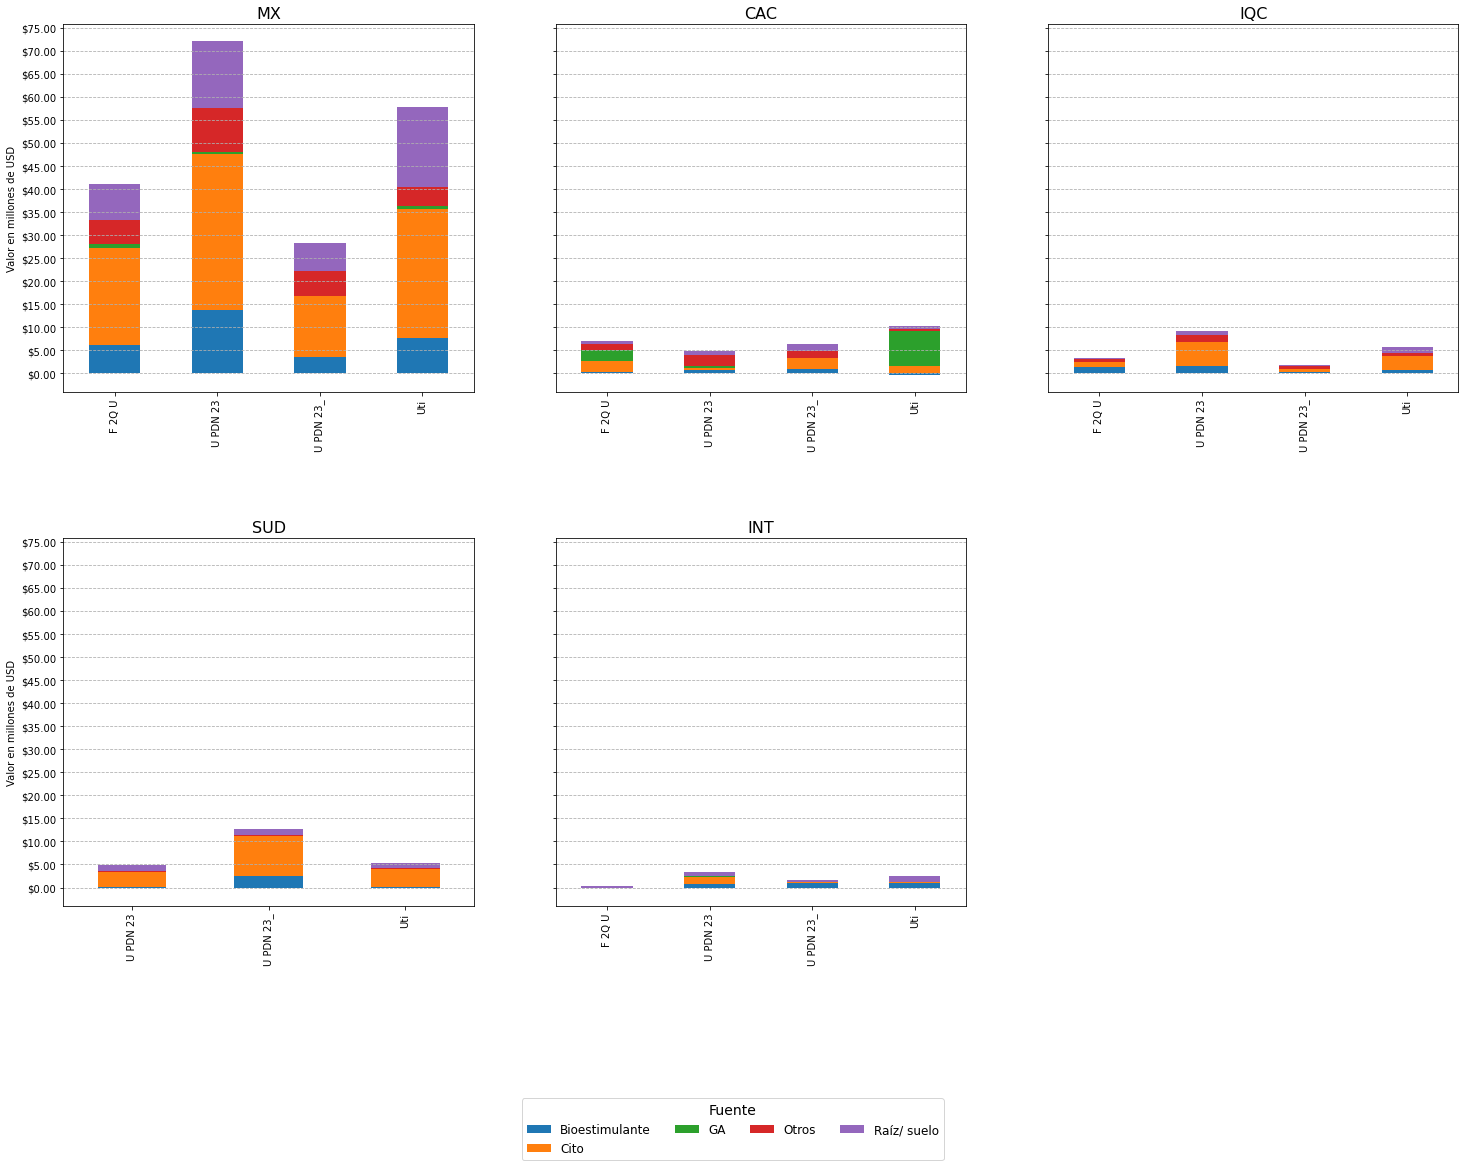

S = Solicitado; Ut y V = Utilidad y Ventas; Egr = Egresos; Inv y Cart = Inventario y Cartera


In [1943]:
import matplotlib as mpl



# Create a figure with subplots for each company
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 18), sharey=True)

# Iterate over each company and subplot
for i, empresa in enumerate(company_order):
    ax = axs.flatten()[i]
    df21_.loc[empresa].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(empresa, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('Valor en millones de USD')
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.2f}'))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(5))
    ax.grid(axis='y', linestyle='--')
    ax.legend().set_visible(False)
    
# Remove the remaining subplots
for i in range(len(company_order), len(axs.flatten())):
    fig.delaxes(axs.flatten()[i])

# Add a subplot for the legend and display it
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=12, title='Fuente', title_fontsize=14)
plt.subplots_adjust(bottom=0.2)    

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4)

# Display the plot
plt.savefig('df21_.png')
plt.show()
print("S = Solicitado; Ut y V = Utilidad y Ventas; Egr = Egresos; Inv y Cart = Inventario y Cartera")